**<center><h2>Ejemplo red neuronal convolucional</h2></center>**

In [1]:
# se cargan las librerias
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers, optimizers
from tensorflow import keras

C:\Users\Carlos pineda\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Carlos pineda\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Carlos pineda\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Carlos pineda\Anaconda3\lib\site-packages\tensorboar

In [2]:
columnas = ["blusa" , "pantalón", "chaqueta", "vestido","corbata","sandalia", 
            "sueter","zapatilla","bolso","bota"]

In [3]:
# se cargan los datos del dataset fashion mnist
datos = keras.datasets.fashion_mnist
(img_ent, eti_ent),  (img_pru, eti_pru) = datos.load_data()

In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


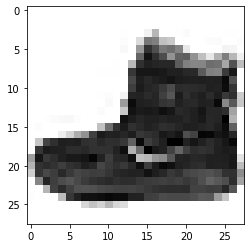

In [4]:
# se visualiza la imagen 0
import matplotlib.pyplot as plt
plt.imshow(img_ent[0], cmap=plt.cm.binary)

In [5]:
#preprocesado
img_ent = img_ent.reshape((60000,28,28,1))
img_pru = img_pru.reshape((10000,28,28,1))

img_ent = img_ent.astype('float32') / 255
img_pru = img_pru.astype('float32') / 255

from keras.utils import to_categorical
eti_ent = to_categorical(eti_ent , num_classes=10)
eti_pru = to_categorical(eti_pru, num_classes=10)

Using TensorFlow backend.


In [6]:
#definimos el model
modelo = Sequential()
modelo.add(Conv2D( 32, (5,5), activation='relu' , input_shape=(28,28,1) ))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(2,2))

modelo.add(Conv2D(64, (5,5), activation='relu'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D(2, 2))

modelo.add(keras.layers.Dropout(0.5))
modelo.add(Flatten())
modelo.add(Dense(10, activation='softmax'))

In [7]:
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [ ]:
# se compila y se entrena el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'] )
historia = modelo.fit(img_ent, eti_ent , epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.5801 - accuracy: 0.8064 - val_loss: 0.3615 - val_accuracy: 0.8725
Epoch 2/10
1499/1500 [============================>.] - ETA: 0s - loss: 0.3886 - accuracy: 0.8628

In [ ]:
# se grafican error durante el entrenamiento 
import pandas as pd
datos = pd.DataFrame(historia.history)
datos['epoca'] = historia.epoch

plt.figure()
plt.xlabel("epocas")
plt.ylabel("error entrenamiento")
plt.plot(datos['epoca'] , datos['loss'], label='entrenamiento')

plt.plot(datos['epoca'] , datos['val_loss'], label='validación')
plt.legend()
plt.show()

In [ ]:
# evaluar la exactitud
loss, exac = modelo.evaluate(img_pru , eti_pru)
print("La exactitud es: " , exac)


In [ ]:
from google.colab import files
arc = files.upload()


In [ ]:
# mostramos la imagen
import numpy as np
from keras.preprocessing import image
test_img = image.load_img("pantalon.jpg", target_size=(28, 28))
plt.imshow(test_img, cmap=plt.cm.binary)

In [ ]:
# probamos la predicción con la imagen anterior
test_img = image.img_to_array(test_img)
test_img = test_img[:,:,1].reshape(1,28,28,1)
test_img = test_img/255

res = modelo.predict(test_img)
print("Resultado predicción: " , columnas[np.argmax(res)]) 